In [18]:
import pandas as pd
df_1 = pd.read_csv("dataset.csv")
df_1["geo_country_title_en"] = df_1["geo_country_title_en"].fillna("Unknown")

print("df")

df


In [4]:
import sqlite3

In [19]:
conn = sqlite3.connect(":memory:")

df=df_1.to_sql("str_th", conn, index=False, if_exists="replace")
print('connected')

connected


In [6]:
for column in df.columns:
    query = f"SELECT DISTINCT {column} FROM str_th"
    unique_values = pd.read_sql(query, conn)
    
    print(f"Столбец: {column}")
    print(unique_values)
    print("-" * 50)

Столбец: ts
                       ts
0     2024-12-07 19:41:46
1     2024-12-07 19:41:47
2     2024-12-07 19:41:48
3     2024-12-07 19:41:49
4     2024-12-07 19:41:50
...                   ...
8243  2024-12-07 20:59:53
8244  2024-12-07 20:59:54
8245  2024-12-07 20:59:55
8246  2024-12-07 20:59:56
8247  2024-12-07 20:59:57

[8248 rows x 1 columns]
--------------------------------------------------
Столбец: counter_id
   counter_id
0        1115
--------------------------------------------------
Столбец: ip
                     ip
0        95.179.122.106
1         188.65.247.26
2         176.14.92.232
3       194.190.131.245
4        151.249.194.78
...                 ...
204586   176.15.243.227
204587   46.191.233.239
204588    95.179.31.134
204589   213.135.158.32
204590   178.217.44.123

[204591 rows x 1 columns]
--------------------------------------------------
Столбец: page_view_order_number
     page_view_order_number
0                         1
1                         2
2      

In [9]:
import matplotlib.pyplot as plt

2


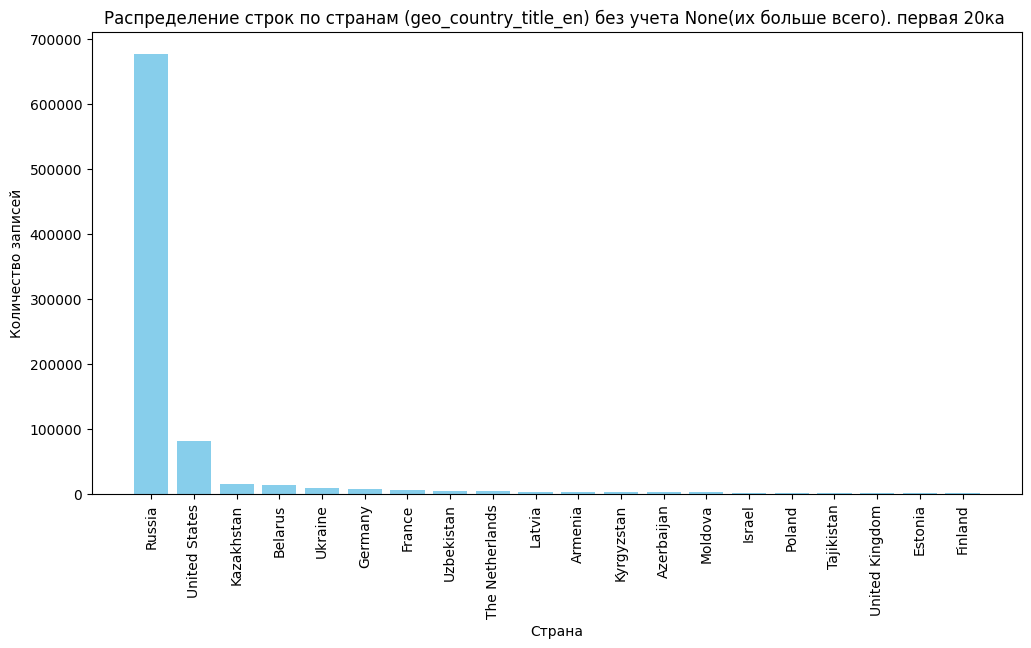

In [16]:
#считаем количество строк для каждого уникального значения geo_country_title_en
query = """
SELECT geo_country_title_en, COUNT(*) as count 
FROM str_th 
WHERE geo_country_title_en != 'Unknown'
GROUP BY geo_country_title_en 
ORDER BY count DESC
LIMIT 20
"""
data = pd.read_sql(query, conn)
print(2)


# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(data["geo_country_title_en"], data["count"], color="skyblue")
plt.xlabel("Страна")
plt.ylabel("Количество записей")
plt.title("Распределение строк по странам (geo_country_title_en) без учета None(их больше всего). первая 20ка ")
plt.xticks(rotation=90)  # Поворот подписей стран, если их много
plt.show()

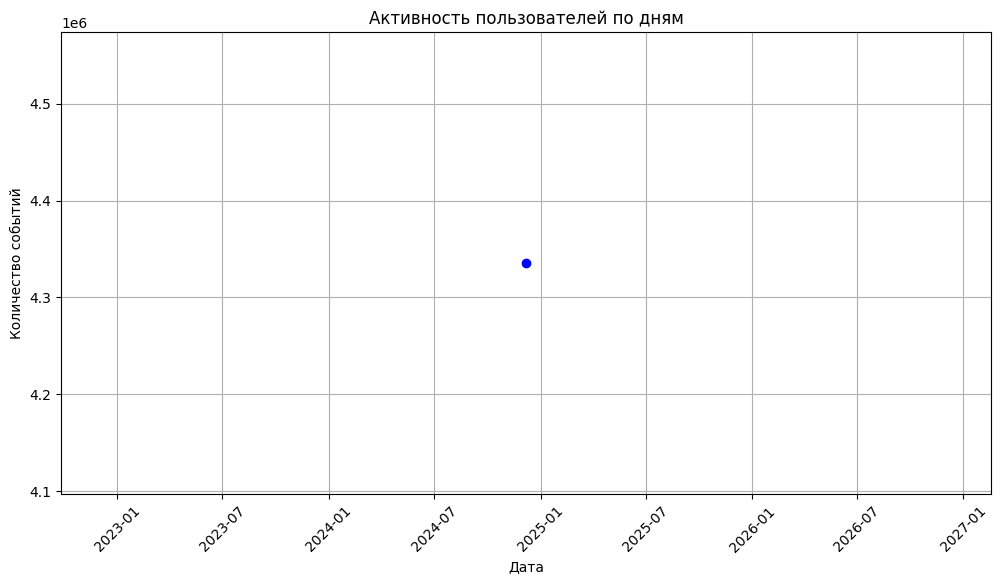

In [23]:
df_1["ts"] = pd.to_datetime(df_1["ts"], errors="coerce")  # Преобразуем в datetime
df_1["date"] = df_1["ts"].dt.date 

events_per_day = df_1.groupby("date").size()

# Строим график активности
plt.figure(figsize=(12, 6))
plt.plot(events_per_day.index, events_per_day.values, marker="o", linestyle="-", color="b")
plt.xlabel("Дата")
plt.ylabel("Количество событий")
plt.title("Активность пользователей по дням")
plt.xticks(rotation=45)
plt.grid()
plt.show()

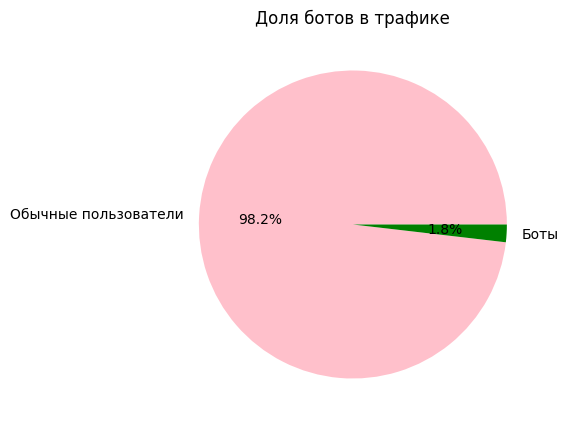

In [28]:
bot_traffic = df_1["ua_is_bot"].fillna(0).value_counts()
labels = bot_traffic.index.map(lambda x: "Боты" if x == 1 else "Обычные пользователи")

# Строим круговую диаграмму
plt.figure(figsize=(5, 5))
plt.pie(bot_traffic, labels=labels, autopct="%1.1f%%", colors=["pink", "green"])
plt.title("Доля ботов в трафике")
plt.show()

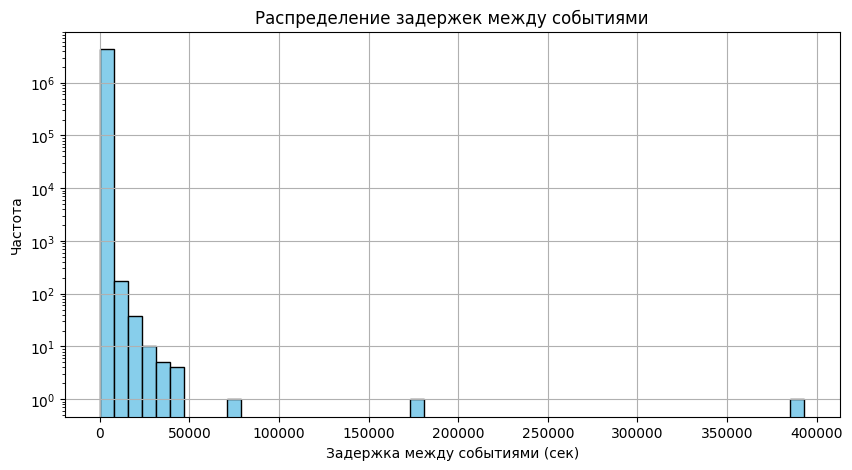

In [30]:
plt.figure(figsize=(10, 5))
plt.hist(df_1["secs"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Задержка между событиями (сек)")
plt.ylabel("Частота")
plt.title("Распределение задержек между событиями")
plt.yscale("log")  # Логарифмическая шкала для наглядности
plt.grid()
plt.show()